# Image classification Food101

##Descrição:

Este conjunto de dados consiste em 101 categorias de alimentos, com 101.000 imagens. Para cada aula, são fornecidas 250 imagens de teste revisadas manualmente, bem como 750 imagens de treinamento. De propósito, as imagens de treinamento não foram limpas e, portanto, ainda contêm algum ruído. Isso vem principalmente na forma de cores intensas e, às vezes, rótulos errados. Todas as imagens foram redimensionadas para ter um comprimento lateral máximo de 512 pixels.

[Documentação](https://www.tensorflow.org/datasets/catalog/food101?hl=en)

#Sorteio dos temas

Ordem dos datasets para o sorteio dos temas:
1. Cifar100
2. Food101
3. Oxford Flowers102

Os nomes dos datasets foram inseridos e sorteados online [aqui](https://sorteador.com.br/sorteio-de-nomes).

A ordem alfabética dos nomes de cada residente do grupo receberá a respectiva ordem de sorteio do dataset.

#Requisitos

Execute os requisitos conforme a necessidade da técnica escolhida.

Você tem total liberdade para escolher a técnica para resolver esse problema.

1. Carregue o dataset
2. Pré-processe o dataset conforme necessário
3. Treine um modelo de classificação
4. Avalie os resultados desse treinamento
5. Avalie o modelo em um subset de testes

Documente suas ações usando blocos de texto

Plote gráficos/imagens de exemplos

#TensorFlow Datasets [documentação disponível aqui](https://www.tensorflow.org/datasets/overview?hl=en)

# Montar o drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os

from pathlib import Path
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras import Model
from keras.optimizers import Adam

# Dataset

* https://www.tensorflow.org/datasets/catalog/food101
* https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/food101.py


## Extrair dataset

O dataset está salvo em meu drive. É um arquivo .tar.gz, então vamos extrair os arquivos da seguinte maneira:

In [ ]:
!tar -xzvf "drive/MyDrive/CPQD/atividade/food-101.tar.gz" -C "drive/MyDrive/CPQD/atividade"

A saída de streaming foi truncada nas últimas 5000 linhas.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/

Podemos observar que a pasta com os arquivos extraídos foi criada: "food-101".

In [ ]:
!ls drive/MyDrive/CPQD/atividade

food-101  food-101.tar.gz  natalia_Food101_Atividade_Multiclass_Classification.ipynb


## Explorar diretórios

Observemos o que há dentro de "food-101".

In [ ]:
!ls -l drive/MyDrive/CPQD/atividade/food-101

total 10
drwx------ 103 root root 4096 Jun 22  2014 images
-rw-------   1 root root  399 Jul  8  2014 license_agreement.txt
drwx------   2 root root 4096 Apr 27  2014 meta
-rw-------   1 root root  697 Jul  8  2014 README.txt


Na pasta "meta" temos arquivos com informações importantes para quem quiser já utilizar os conjuntos de dados e de teste prontos.

In [ ]:
!ls -l drive/MyDrive/CPQD/atividade/food-101/meta

total 4128
-rw------- 1 root root    1184 Jul  9  2014 classes.txt
-rw------- 1 root root    1184 Sep 23  2013 labels.txt
-rw------- 1 root root  566868 Sep 23  2013 test.json
-rw------- 1 root root  489429 Sep 23  2013 test.txt
-rw------- 1 root root 1697751 Sep 21  2013 train.json
-rw------- 1 root root 1468812 Sep 21  2013 train.txt


Aqui vemos as classes presentes no dataset.

In [ ]:
!cat drive/MyDrive/CPQD/atividade/food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
sa

As imagens de cada classe estão separadas em diferentes diretórios.

In [ ]:
!ls -l drive/MyDrive/CPQD/atividade/food-101/images

total 404
drwx------ 2 root root 4096 Sep 21  2013 apple_pie
drwx------ 2 root root 4096 Sep 21  2013 baby_back_ribs
drwx------ 2 root root 4096 Sep 21  2013 baklava
drwx------ 2 root root 4096 Sep 21  2013 beef_carpaccio
drwx------ 2 root root 4096 Sep 21  2013 beef_tartare
drwx------ 2 root root 4096 Feb  6 23:48 beet_salad
drwx------ 2 root root 4096 Feb  6 23:43 beignets
drwx------ 2 root root 4096 Sep 21  2013 bibimbap
drwx------ 2 root root 4096 Sep 21  2013 bread_pudding
drwx------ 2 root root 4096 Sep 21  2013 breakfast_burrito
drwx------ 2 root root 4096 Feb  6 23:44 bruschetta
drwx------ 2 root root 4096 Sep 21  2013 caesar_salad
drwx------ 2 root root 4096 Feb  7 00:05 cannoli
drwx------ 2 root root 4096 Feb  7 00:01 caprese_salad
drwx------ 2 root root 4096 Sep 21  2013 carrot_cake
drwx------ 2 root root 4096 Feb  7 00:04 ceviche
drwx------ 2 root root 4096 Sep 21  2013 cheesecake
drwx------ 2 root root 4096 Sep 21  2013 cheese_plate
drwx------ 2 root root 4096 Sep 21  2013

Arquivos da classe "chocolate_mousse":

In [ ]:
!ls -l drive/MyDrive/CPQD/atividade/food-101/images/chocolate_mousse/

total 44603
-rw------- 1 root root  29305 Sep 21  2013 1002682.jpg
-rw------- 1 root root  44994 Sep 21  2013 1008451.jpg
-rw------- 1 root root  49348 Sep 21  2013 1013482.jpg
-rw------- 1 root root  30082 Sep 21  2013 1014185.jpg
-rw------- 1 root root  49491 Sep 21  2013 1018802.jpg
-rw------- 1 root root  21751 Sep 21  2013 1026492.jpg
-rw------- 1 root root  41979 Sep 21  2013 1027823.jpg
-rw------- 1 root root  90764 Sep 21  2013 1034251.jpg
-rw------- 1 root root  46424 Sep 21  2013 1042851.jpg
-rw------- 1 root root  38120 Sep 21  2013 1045302.jpg
-rw------- 1 root root  99456 Sep 21  2013 1045935.jpg
-rw------- 1 root root  42959 Sep 21  2013 1051638.jpg
-rw------- 1 root root  31883 Sep 21  2013 1062490.jpg
-rw------- 1 root root  49132 Sep 21  2013 106928.jpg
-rw------- 1 root root  53120 Sep 21  2013 1081685.jpg
-rw------- 1 root root  29083 Sep 21  2013 1083233.jpg
-rw------- 1 root root  71464 Sep 21  2013 1084277.jpg
-rw------- 1 root root  52486 Sep 21  2013 1092783.jpg

## Observar imagens

* https://colab.research.google.com/drive/1Z5-LqlJxNslHcCzM9jChsNhGi9Y7HSC4#scrollTo=gdMUurhC5J8a

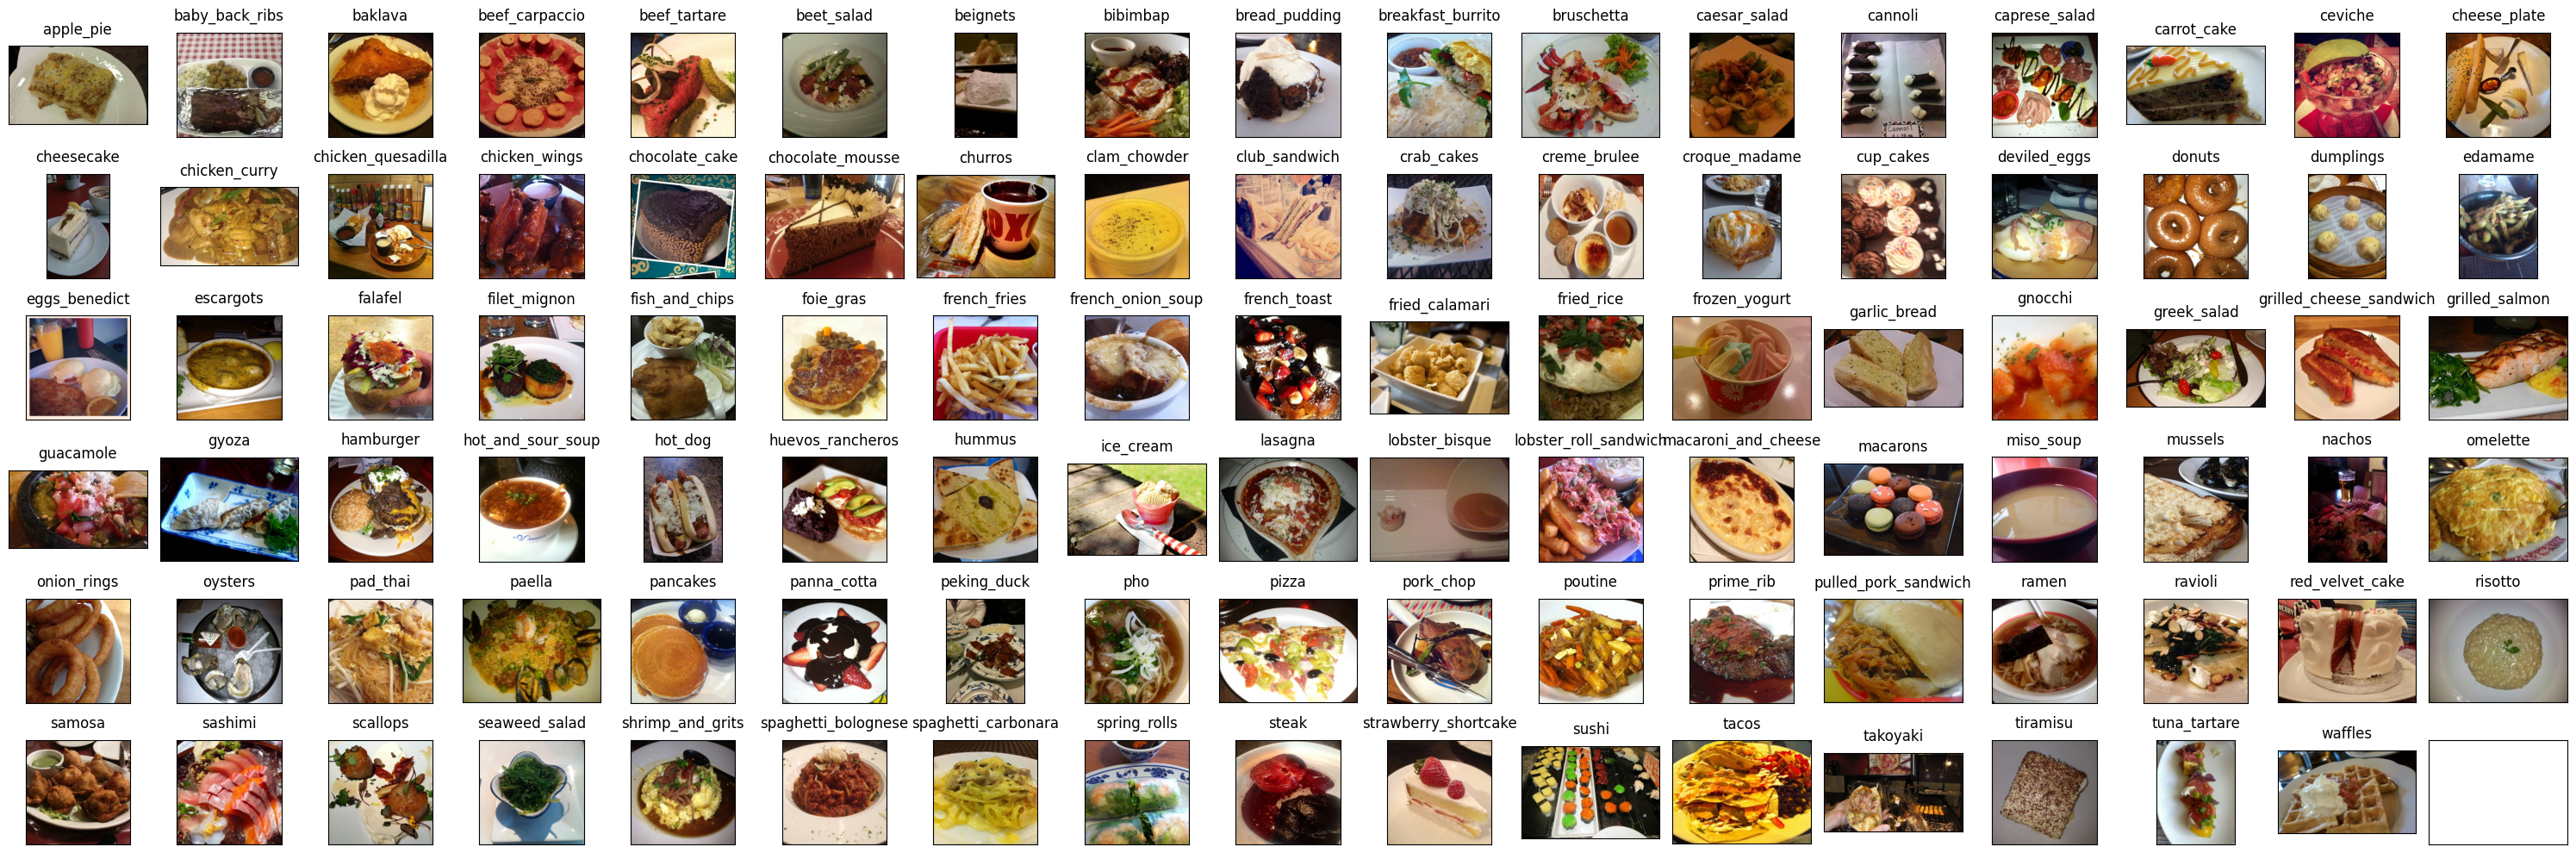

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os

rows = 6
cols = 17
fig, ax = plt.subplots(rows, cols, figsize=(30,10))

data_dir = "drive/MyDrive/CPQD/atividade/food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

## Criar dataframe com endereços das imagens e seus respectivos rótulos

Vamos criar um dataframe para facilitar o acesso às imagens através de seus endereços, sempre com seus respectivos rótulos.

In [ ]:
from pathlib import Path

dataset = "drive/MyDrive/CPQD/atividade/food-101/images"
image_dir=Path(dataset)

In [ ]:
!ls $image_dir

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [ ]:
import pandas as pd

# enderecos
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

# rotulos
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# dataframe
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# concatenar informacoes
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

Filepath                Label
0       drive/MyDrive/CPQD/atividade/food-101/images/b...             beignets
1       drive/MyDrive/CPQD/atividade/food-101/images/b...             beignets
2       drive/MyDrive/CPQD/atividade/food-101/images/b...             beignets
3       drive/MyDrive/CPQD/atividade/food-101/images/b...             beignets
4       drive/MyDrive/CPQD/atividade/food-101/images/b...             beignets
...                                                   ...                  ...
100995  drive/MyDrive/CPQD/atividade/food-101/images/s...  spaghetti_bolognese
100996  drive/MyDrive/CPQD/atividade/food-101/images/s...  spaghetti_bolognese
100997  drive/MyDrive/CPQD/atividade/food-101/images/s...  spaghetti_bolognese
100998  drive/MyDrive/CPQD/atividade/food-101/images/s...  spaghetti_bolognese
100999  drive/MyDrive/CPQD/atividade/food-101/images/s...  spaghetti_bolognese

[101000 rows x 2 columns]

O dataframe contém 101.000 linhas, que correspondem aos endereços e rótulos das imagens do dataset.

## Separar em conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_df.shape

(80800, 2)

In [30]:
test_df.shape

(20200, 2)

## Pré-processar imagens

Vamos realizar o pré-processamento das imagens para uma rede simples.

* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1. / 255,
                                     validation_split=0.2
                                    )

test_generator = ImageDataGenerator(rescale=1. / 255,)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),   # vi que eh um tamanho padrao p/varias redes
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 64640 validated image filenames belonging to 101 classes.
Found 16160 validated image filenames belonging to 101 classes.
Found 20200 validated image filenames belonging to 101 classes.


# Modelos

## Modelo sequencial simples

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(101, activation='softmax'),
    ]
)

In [ ]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

model.fit(train_images, validation_data=val_images, epochs=5, verbose = 1)

Epoch 1/5
2020/2020 [==============================] - 622s 304ms/step - loss: 4.5986 - accuracy: 0.0134 - val_loss: 4.5028 - val_accuracy: 0.0213
Epoch 2/5
2020/2020 [==============================] - 562s 278ms/step - loss: 4.4796 - accuracy: 0.0243 - val_loss: 4.4168 - val_accuracy: 0.0340
Epoch 3/5
2020/2020 [==============================] - 535s 265ms/step - loss: 4.4215 - accuracy: 0.0303 - val_loss: 4.3796 - val_accuracy: 0.0376
Epoch 4/5
2020/2020 [==============================] - 514s 254ms/step - loss: 4.3497 - accuracy: 0.0376 - val_loss: 4.3532 - val_accuracy: 0.0475
Epoch 5/5
2020/2020 [==============================] - 524s 259ms/step - loss: 4.2282 - accuracy: 0.0511 - val_loss: 4.3271 - val_accuracy: 0.0480


O resultado está muito ruim.

Se tivéssemos um dado de 101 lados, a probabilidade de acertar a classe da comida jogando o dado seria de aproximadamente 1%. A acurácia da rede está em 5% para os dados de treinamento.

Vamos utilizar transfer learning para tentar obter resultados melhores.

## Resnet50

Precisamos pré-processar as imagens para o novo modelo.

In [ ]:
train_generator = ImageDataGenerator (#rescale=1. / 255,
                                      preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                      validation_split=0.2
                                      )

test_generator = ImageDataGenerator(#rescale=1. / 255,
                                    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
                                    )

Agora recriamos os conjuntos com base no pré-processamento definido.

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=False
)

Found 64640 validated image filenames belonging to 101 classes.
Found 16160 validated image filenames belonging to 101 classes.
Found 20200 validated image filenames belonging to 101 classes.


Agora vamos à Resnet50:

In [ ]:
pretrained_model=tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                                include_top=False,
                                                weights='imagenet',
                                                pooling='avg'
                                                )

94765736/94765736 [==============================] - 5s 0us/step


Não queremos retreinar o modelo, e sim aproveitar seus pesos!

In [ ]:
pretrained_model.trainable = False

Criar checkpoint:

* https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=RzIOVSdnMYyO

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

checkpoint_path = "drive/MyDrive/CPQD/atividade/checkpoint.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

Utilizar early stopping para parar o treinamento caso "val_loss" não melhore:

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 5,
                               restore_best_weights = True)

Finalmente... agora vamos ao modelo!

In [ ]:
resize_and_rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255),])

inputs=pretrained_model.inputs
x = resize_and_rescale(inputs)
x = tf.keras.layers.Dense(256,activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(101, activation='softmax')(x)

In [ ]:
from keras import Model

model=Model(inputs,outputs)

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Vamos importar algumas funções para nos ajudar...

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=5,
    callbacks=[
        early_stopping,
        checkpoint_callback,
    ]
)

Epoch 1/5
505/505 [==============================] - 640s 1s/step - loss: 2.8582 - accuracy: 0.3151 - val_loss: 2.2657 - val_accuracy: 0.4641
Epoch 2/5
505/505 [==============================] - 646s 1s/step - loss: 2.4463 - accuracy: 0.3949 - val_loss: 2.0195 - val_accuracy: 0.5083
Epoch 3/5
505/505 [==============================] - 617s 1s/step - loss: 2.2204 - accuracy: 0.4425 - val_loss: 1.8920 - val_accuracy: 0.5327
Epoch 4/5
505/505 [==============================] - 633s 1s/step - loss: 2.0690 - accuracy: 0.4750 - val_loss: 1.7909 - val_accuracy: 0.5518
Epoch 5/5
505/505 [==============================] - 631s 1s/step - loss: 1.9609 - accuracy: 0.4970 - val_loss: 1.7330 - val_accuracy: 0.5642


Utilizei apenas 5 épocas para não correr o risco de o colab desconectar. A acurácia foi de quase 50% para o conjunto de treinamento. Mais épocas trariam um resultado mais interessante.

# Avaliação do modelo com Resnet50

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.72159
Test Accuracy: 57.02%


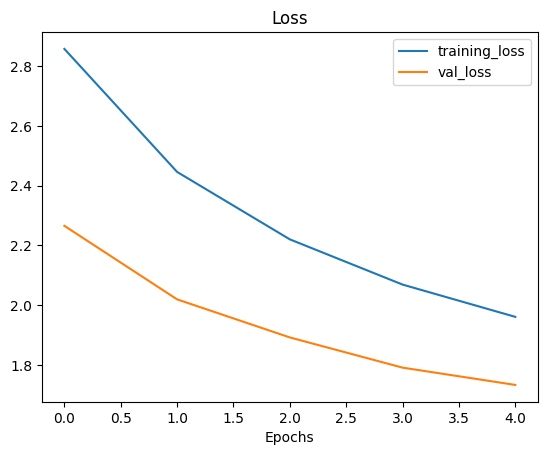

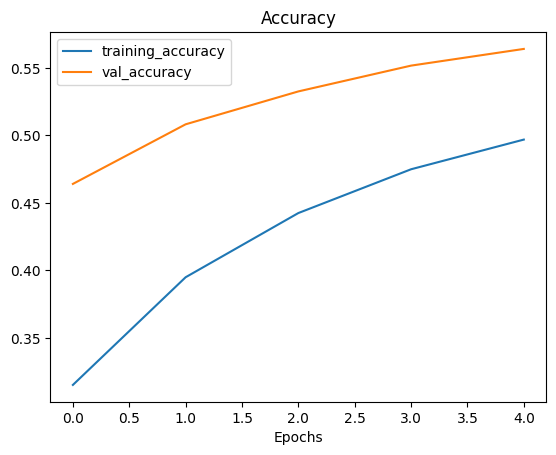

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();